# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.neighbors import KernelDensity

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
train_df = pd.read_csv('train.csv')
df = pd.read_csv('df_merge_final.csv', parse_dates=['Date'])
spray = pd.read_csv('spray.csv')
mapdata = np.loadtxt("mapdata_copyright_openstreetmap_contributors.txt")

# Location of the streets to traps

In [3]:
loc_df = train_df[['Trap', 'Street', 'Species', 'WnvPresent']]

In [4]:
loc_df.head()

Trap           Street                 Species  WnvPresent
0  T002   N OAK PARK AVE  CULEX PIPIENS/RESTUANS           0
1  T002   N OAK PARK AVE          CULEX RESTUANS           0
2  T007    N MANDELL AVE          CULEX RESTUANS           0
3  T015     W FOSTER AVE  CULEX PIPIENS/RESTUANS           0
4  T015     W FOSTER AVE          CULEX RESTUANS           0

In [5]:
loc_df['Trap'].unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [6]:
params = ['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
       'T027', 'T156', 'T157', 'T221', 'T900', 'T903', 'T222', 'T223',
       'T225', 'T227', 'T224', 'T226', 'T229', 'T230', 'T228', 'T232',
       'T231', 'T235', 'T233', 'T236', 'T237', 'T238', 'T094B', 'T054C']

In [7]:
for value in params:
    df_name = 'df' + value
    df_name = loc_df[loc_df['Trap'] == value]
    print(f"{df_name.iloc[0]['Trap']} is located in {df_name.iloc[0]['Street']}")

T002 is located in  N OAK PARK AVE
T007 is located in  N MANDELL AVE
T015 is located in  W FOSTER AVE
T045 is located in  W WEBSTER AVE
T046 is located in  W GRAND AVE
T048 is located in  W ROOSEVELT
T049 is located in  W CHICAGO
T050 is located in  N STAVE ST
T054 is located in  N CANNON DR
T086 is located in  W 113TH ST
T091 is located in  S PEORIA ST
T094 is located in  W 95TH ST
T096 is located in  W 89TH ST
T129 is located in  N STREETER DR
T143 is located in  N OAK PARK AVE
T148 is located in  N OAKLEY AVE
T153 is located in  N LONG AVE
T159 is located in  S CARPENTER ST
T009 is located in  W HIGGINS AVE
T011 is located in  N PITTSBURGH AVE
T016 is located in  N OKETO AVE
T019 is located in  N CALIFORNIA AVE
T025 is located in  W BALMORAL AVE
T028 is located in  N WESTERN AVE
T031 is located in  S CENTRAL AVE
T033 is located in  N HUMBOLDT DR
T089 is located in  S VINCENNES
T090 is located in  S ASHLAND AVE
T092 is located in  S STATE ST
T135 is located in  W 127TH PL
T141 is loc

In [8]:
df.head()

Date                 Species  Trap   Latitude  Longitude  \
0 2007-05-29  CULEX PIPIENS/RESTUANS  T002  41.954690 -87.800991   
1 2007-05-29          CULEX RESTUANS  T002  41.954690 -87.800991   
2 2007-05-29          CULEX RESTUANS  T007  41.994991 -87.769279   
3 2007-05-29  CULEX PIPIENS/RESTUANS  T015  41.974089 -87.824812   
4 2007-05-29          CULEX RESTUANS  T015  41.974089 -87.824812   

   AddressAccuracy  NumMosquitos  WnvPresent  Station  Tavg  ...  Heat  \
0                9             1           0      1.0  74.0  ...   0.0   
1                9             1           0      1.0  74.0  ...   0.0   
2                9             1           0      1.0  74.0  ...   0.0   
3                8             1           0      1.0  74.0  ...   0.0   
4                8             4           0      1.0  74.0  ...   0.0   

   CodeSum PrecipTotal  SeaLevel  ResultDir  AvgSpeed            Sunrise_1  \
0    BR HZ         0.0     30.11         18       6.5  1900-01-01 04:21:00   
1    BR HZ         0.0     30.11         18       6.5  1900-01-01 04:21:00   
2    BR HZ         0.0     30.11         18       6.5  1900-01-01 04:21:00   
3    BR HZ         0.0     30.11         18       6.5  1900-01-01 04:21:00   
4    BR HZ         0.0     30.11         18       6.5  1900-01-01 04:21:00   

              Sunset_1 daylight_duration Humidity  
0  1900-01-01 19:17:00   0 days 14:56:00     57.4  
1  1900-01-01 19:17:00   0 days 14:56:00     57.4  
2  1900-01-01 19:17:00   0 days 14:56:00     57.4  
3  1900-01-01 19:17:00   0 days 14:56:00     57.4  
4  1900-01-01 19:17:00   0 days 14:56:00     57.4  

[5 rows x 21 columns]

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Date'].dt.year

0        2007
1        2007
2        2007
3        2007
4        2007
         ... 
10501    2013
10502    2013
10503    2013
10504    2013
10505    2013
Name: Date, Length: 10506, dtype: int64

df_11_13 = df[df['Date'].dt.year == 2011]  df[df['Date'].dt.year == 2013]

In [11]:
spray.head()

Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858

In [12]:
print(f"Latitude max is: {df[['Latitude']].max()}")
print(f"Latitude min is: {df[['Latitude']].min()}")
print("")
print(f"Longitude max is: {df[['Longitude']].max()}")
print(f"Longitude min is: {df[['Longitude']].min()}")

Latitude max is: Latitude    42.01743
dtype: float64
Latitude min is: Latitude    41.644612
dtype: float64

Longitude max is: Longitude   -87.531635
dtype: float64
Longitude min is: Longitude   -87.930995
dtype: float64


In [13]:
# Set the boundary box (must be slightly more than the max and minimum)
bbox = (-88, -87.5, 41.6, 42.1)

In [14]:
# Obtain only columns Longitude and Latitude
traps = df[['Longitude','Latitude']].drop_duplicates().values 

In [15]:
sprays = spray[['Longitude', 'Latitude']].drop_duplicates().values

In [16]:
# Define function
def plot_map (df, color, shape, title):
    plt.figure(figsize=(15,15)) # Figure size
    plt.title(title) # Title of the map
    plt.imshow(mapdata, # Load mapdata
          cmap=plt.get_cmap('gray'), # Set color of map
          extent=bbox, # Set BBox
          );
    plt.scatter(df[:,0], df[:,1], c= color, marker=shape, alpha=1) # Load dataset, set marker to a shape

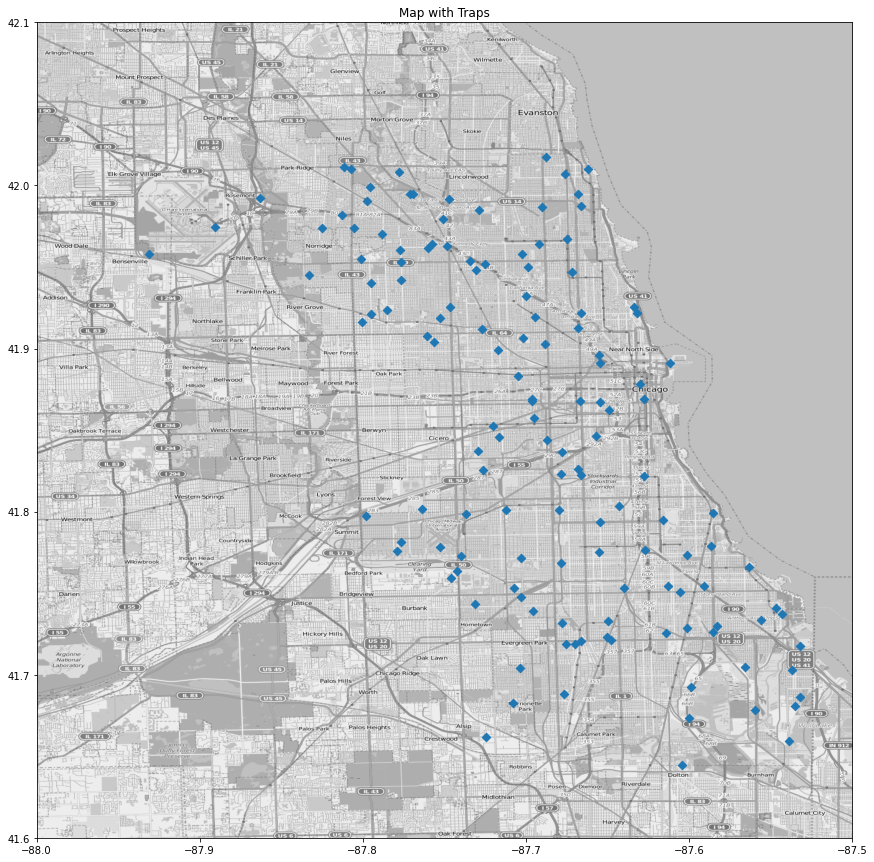

In [17]:
plot_map(traps, None, 'D', 'Map with Traps') # Traps are shown with Diamonds

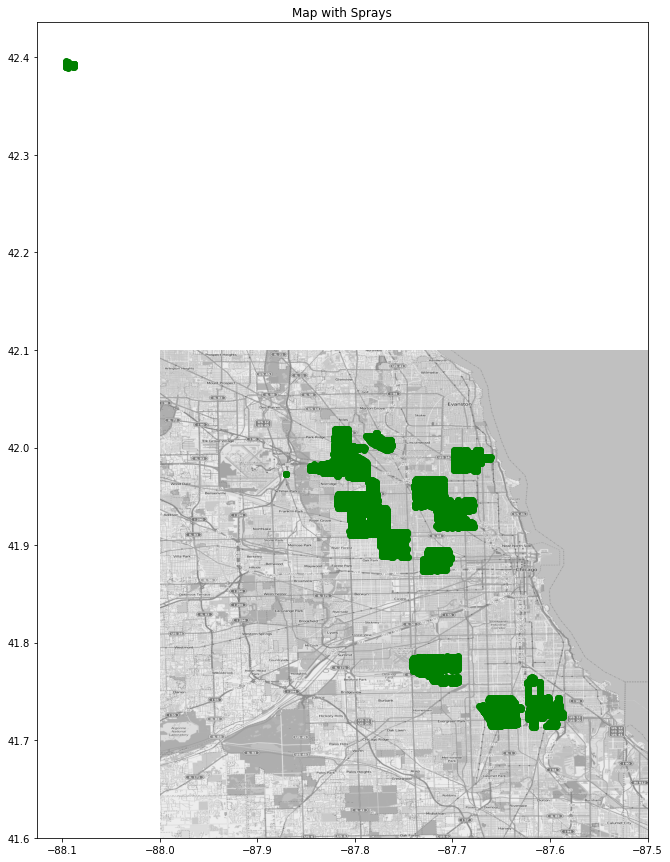

In [18]:
plot_map(sprays, 'g', None, 'Map with Sprays')

In [19]:
sprays_1 = spray[(spray['Latitude'] < 42.1)] # Remove the outlier
sprays_1 = sprays_1[['Longitude', 'Latitude']].drop_duplicates().values

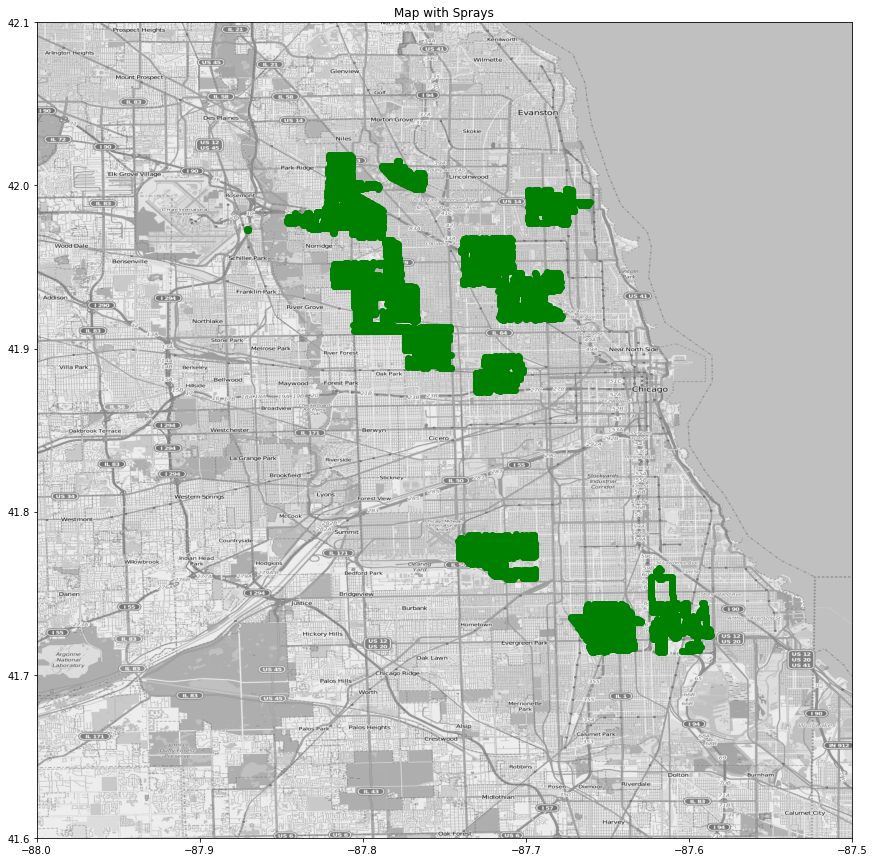

In [20]:
plot_map(sprays_1, 'g', None, 'Map with Sprays')

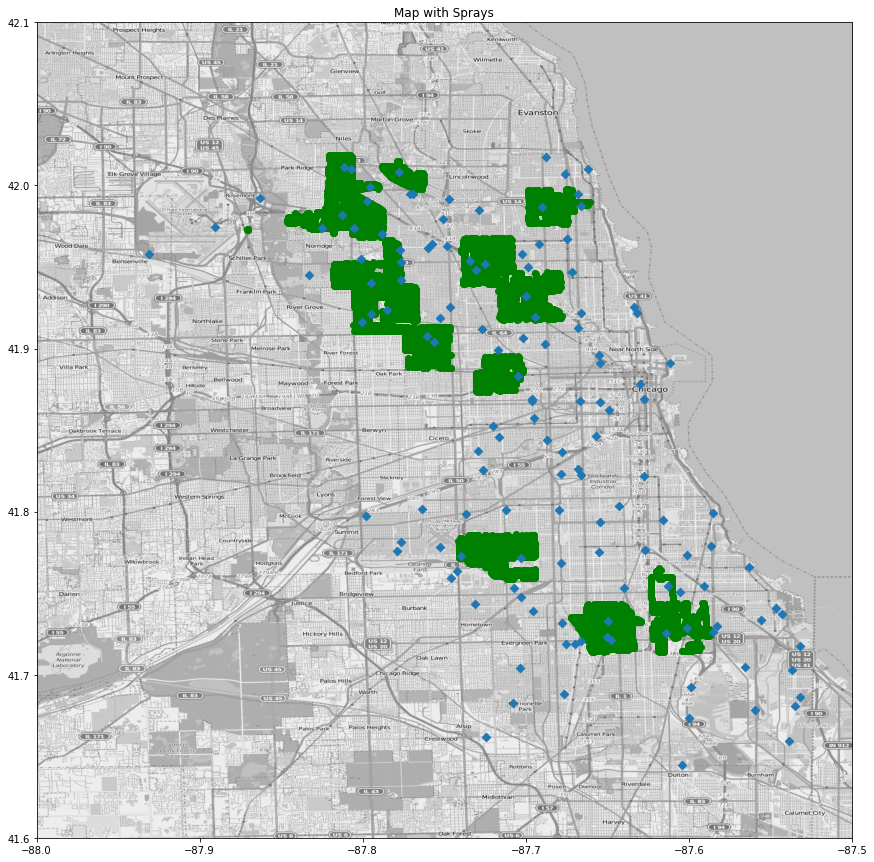

In [21]:
plt.figure(figsize=(15,15))
plt.title('Map with Sprays')
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=bbox,
          );

plt.scatter(sprays_1[:,0], sprays_1[:,1], c='g', alpha=1)
plt.scatter(traps[:,0], traps[:,1], marker='D', alpha=1)

The areas in green shows the areas sprayed in both 2011 and 2013, and the diamond are the trap locations over all the years. The information is currently lacking any significance. We will deploy Kernel Density to look into traps with mosquitos with WNV present across the years to identify approximate locations where the virus has been detected.

# Kernel Density

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Latitude')

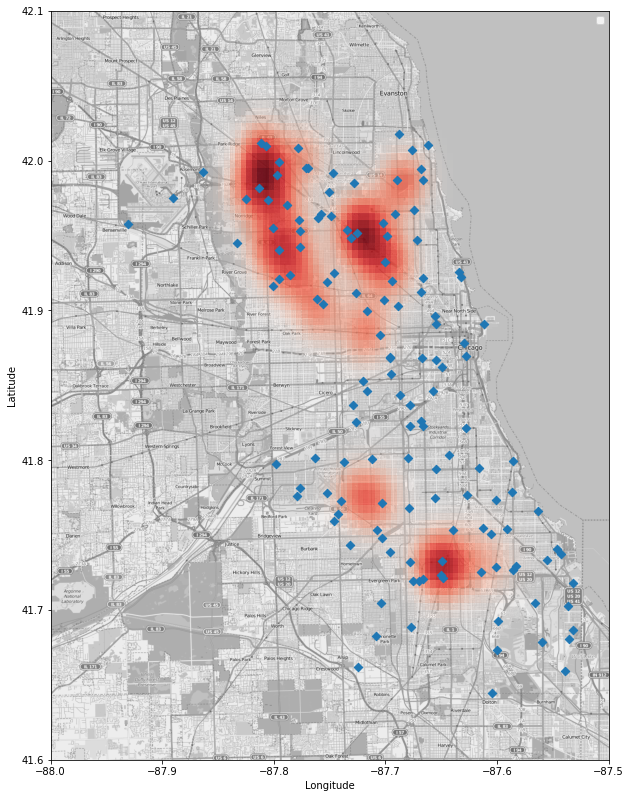

In [22]:
color = plt.cm.Reds
color._init()
color._lut[:-3,-1] = abs(np.logspace(0, 1, color.N) / 10 - 1)[::-1]
# set aspect
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
# fit kernel density onto spray locations
kd = KernelDensity(bandwidth=0.015)
kd.fit(sprays_1)

spray_x, spray_y = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([spray_x.ravel(),spray_y.ravel()]).T
spray_z = np.exp(kd.score_samples(gridpoints).reshape(100,100))

# plot kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=bbox, aspect=aspect)
plt.imshow(spray_z, origin='lower', cmap=color, extent=bbox, aspect=aspect)
plt.scatter(traps[:,0], traps[:,1], marker='D', alpha=1)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [23]:
df['Date'].dt.year.unique()

array([2007, 2009, 2011, 2013], dtype=int64)

In [88]:
df2007 = df[(df['Date'].dt.year == 2007) & (df['WnvPresent'] == 1 )]
df2007 = pd.DataFrame(df2007, columns = ['Longitude','Latitude'])
df2007 = df2007[['Longitude', 'Latitude']].drop_duplicates().values

In [89]:
df2009 = df[(df['Date'].dt.year == 2009) & (df['WnvPresent'] == 1 )]
df2009 = pd.DataFrame(df2009, columns = ['Longitude','Latitude'])
df2009 = df2009[['Longitude', 'Latitude']].drop_duplicates().values

In [90]:
df2011 = df[(df['Date'].dt.year == 2011) & (df['WnvPresent'] == 1 )]
df2011 = pd.DataFrame(df2011, columns = ['Longitude','Latitude'])
df2011 = df2011[['Longitude', 'Latitude']].drop_duplicates().values

In [91]:
df2013 = df[(df['Date'].dt.year == 2013) & (df['WnvPresent'] == 1 )]
df2013 = pd.DataFrame(df2013, columns = ['Longitude','Latitude'])
df2013 = df2013[['Longitude', 'Latitude']].drop_duplicates().values

Text(0, 0.5, 'Latitude')

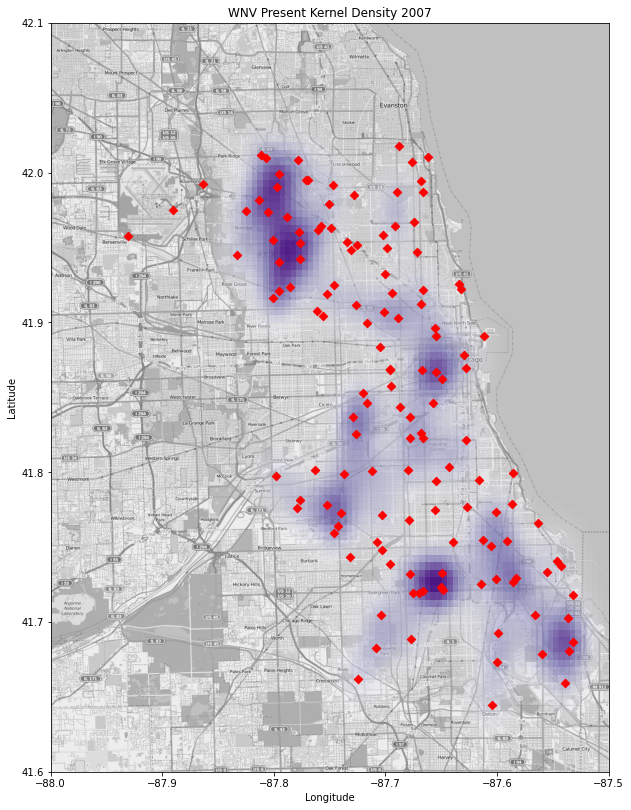

In [101]:
color = plt.cm.Purples
color._init()
color._lut[:-3,-1] = abs(np.logspace(0, 1, color.N) / 10 - 1)[::-1]
# set aspect
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
# fit kernel density onto spray locations
kd = KernelDensity(bandwidth=0.015)
kd.fit(df2007)

spray_x, spray_y = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([spray_x.ravel(),spray_y.ravel()]).T
spray_z = np.exp(kd.score_samples(gridpoints).reshape(100,100))

# plot kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=bbox, aspect=aspect)
plt.imshow(spray_z, origin='lower', cmap=color, extent=bbox, aspect=aspect)
plt.scatter(traps[:,0], traps[:,1], color='r', marker='D', alpha=1)
plt.title('WNV Present Kernel Density 2007')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Latitude')

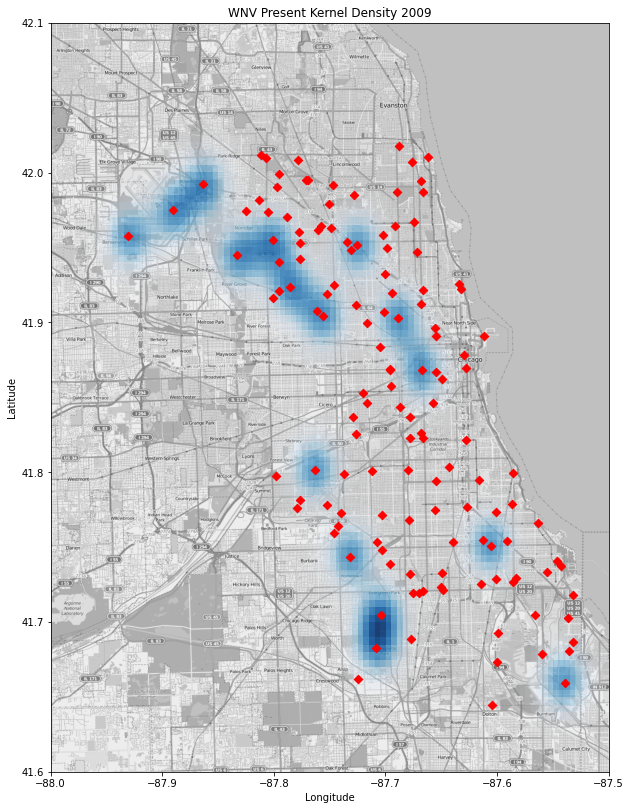

In [102]:
color = plt.cm.Blues
color._init()
color._lut[:-3,-1] = abs(np.logspace(0, 1, color.N) / 10 - 1)[::-1]
# set aspect
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
# fit kernel density onto spray locations
kd = KernelDensity(bandwidth=0.015)
kd.fit(df2009)

spray_x, spray_y = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([spray_x.ravel(),spray_y.ravel()]).T
spray_z = np.exp(kd.score_samples(gridpoints).reshape(100,100))

# plot kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=bbox, aspect=aspect)
plt.imshow(spray_z, origin='lower', cmap=color, extent=bbox, aspect=aspect)
plt.scatter(traps[:,0], traps[:,1], color = 'r',marker='D', alpha=1)
plt.title('WNV Present Kernel Density 2009')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Latitude')

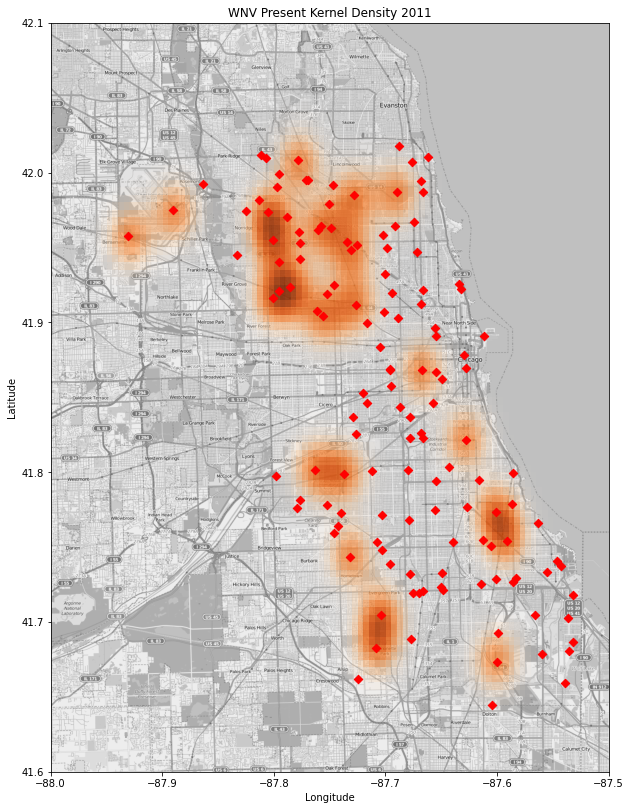

In [105]:
color = plt.cm.Oranges
color._init()
color._lut[:-3,-1] = abs(np.logspace(0, 1, color.N) / 10 - 1)[::-1]
# set aspect
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
# fit kernel density onto spray locations
kd = KernelDensity(bandwidth=0.015)
kd.fit(df2011)

spray_x, spray_y = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([spray_x.ravel(),spray_y.ravel()]).T
spray_z = np.exp(kd.score_samples(gridpoints).reshape(100,100))

# plot kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=bbox, aspect=aspect)
plt.imshow(spray_z, origin='lower', cmap=color, extent=bbox, aspect=aspect)
plt.scatter(traps[:,0], traps[:,1], color = 'r', marker='D', alpha=1)
plt.title('WNV Present Kernel Density 2011')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Latitude')

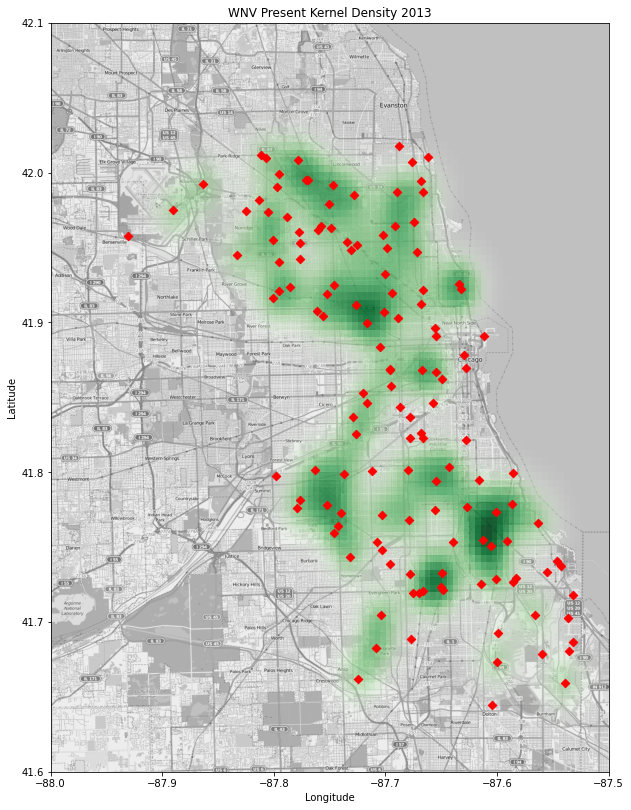

In [106]:
color = plt.cm.Greens
color._init()
color._lut[:-3,-1] = abs(np.logspace(0, 1, color.N) / 10 - 1)[::-1]
# set aspect
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
# fit kernel density onto spray locations
kd = KernelDensity(bandwidth=0.015)
kd.fit(df2013)

spray_x, spray_y = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([spray_x.ravel(),spray_y.ravel()]).T
spray_z = np.exp(kd.score_samples(gridpoints).reshape(100,100))

# plot kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=bbox, aspect=aspect)
plt.imshow(spray_z, origin='lower', cmap=color, extent=bbox, aspect=aspect)
plt.scatter(traps[:,0], traps[:,1], color = 'r', marker='D', alpha=1)
plt.title('WNV Present Kernel Density 2013')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

We are able to see that the frequency changes across the years in terms of WNV present mosquitos. 

In [97]:
colors = ['Purples', 'Reds', 'Oranges', 'Greens']

In [98]:
for year in years:
    df_name = 'df' + str(year)
    df_name = df[(df['Date'].dt.year == year) & (df['WnvPresent'] == 1 )]
    df_name = pd.DataFrame(df_name, columns = ['Longitude','Latitude'])
    df_name = df_name[['Longitude', 'Latitude']].drop_duplicates().values
    
    for x in colors:
        color = plt.cm.x
        color._init()
        color._lut[:-3,-1] = abs(np.logspace(0, 1, color.N) / 10 - 1)[::-1]
    # set aspect
        aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
    # fit kernel density onto spray locations
        kd = KernelDensity(bandwidth=0.015)
        kd.fit(df_name)

        spray_x, spray_y = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
        gridpoints = np.array([spray_x.ravel(),spray_y.ravel()]).T
        spray_z = np.exp(kd.score_samples(gridpoints).reshape(100,100))

    # plot kernel density
        plt.figure(figsize=(10,14))
        plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=bbox, aspect=aspect)
        plt.imshow(spray_z, origin='lower', cmap=color, extent=bbox, aspect=aspect)
        plt.scatter(traps[:,0], traps[:,1], marker='D', alpha=1)
        plt.legend()
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')

AttributeError: module 'matplotlib.cm' has no attribute 'x'

In [39]:
def by_year(year):
    df_name = 'df' + str(year)
    df_name = df[(df['Date'].dt.year == year) & (df['WnvPresent'] == 1 )]
    df_name = df_name[['Longitude', 'Latitude']].drop_duplicates().values
    df_name = pd.DataFrame(df_name, columns = ['Longitude','Latitude'])
    print('Pass')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


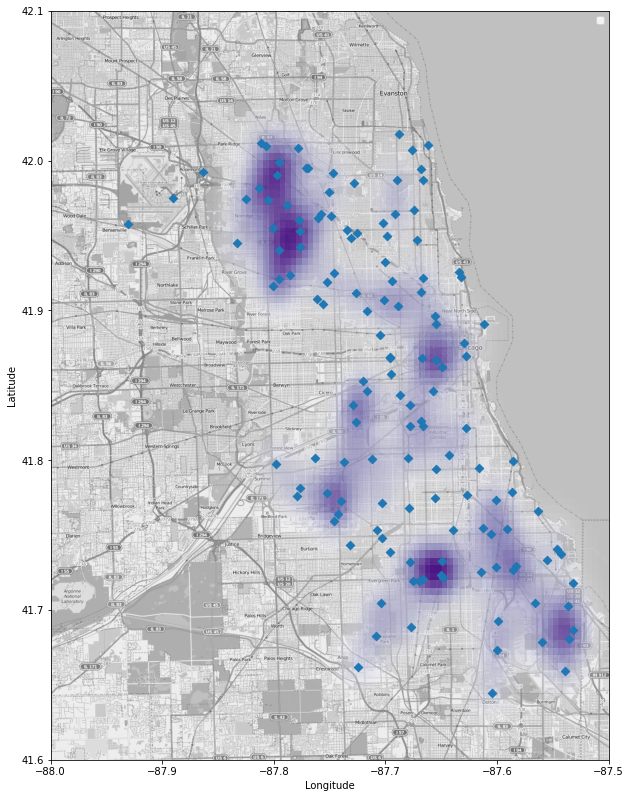

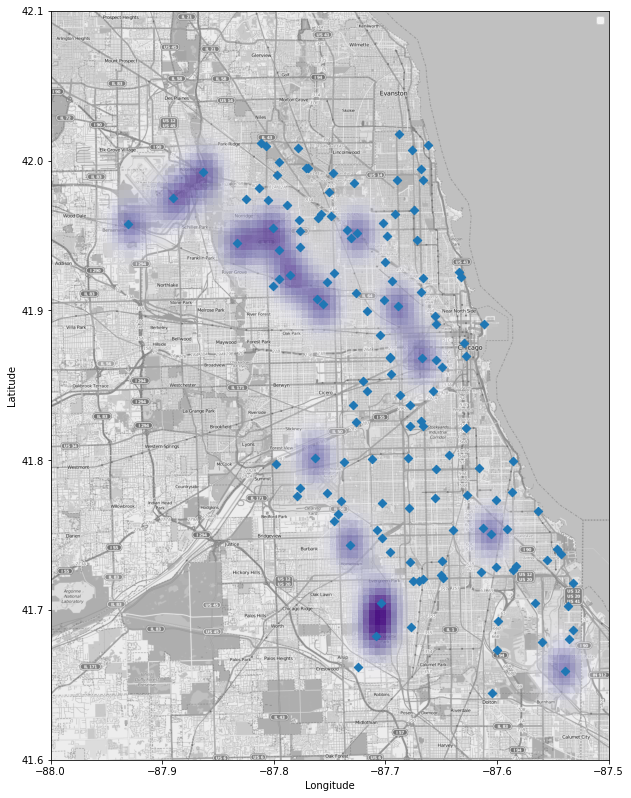

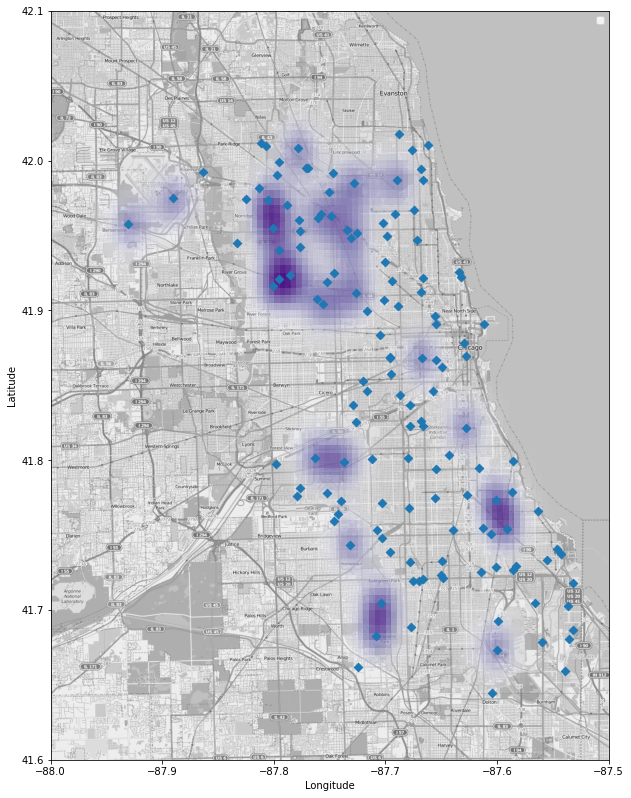

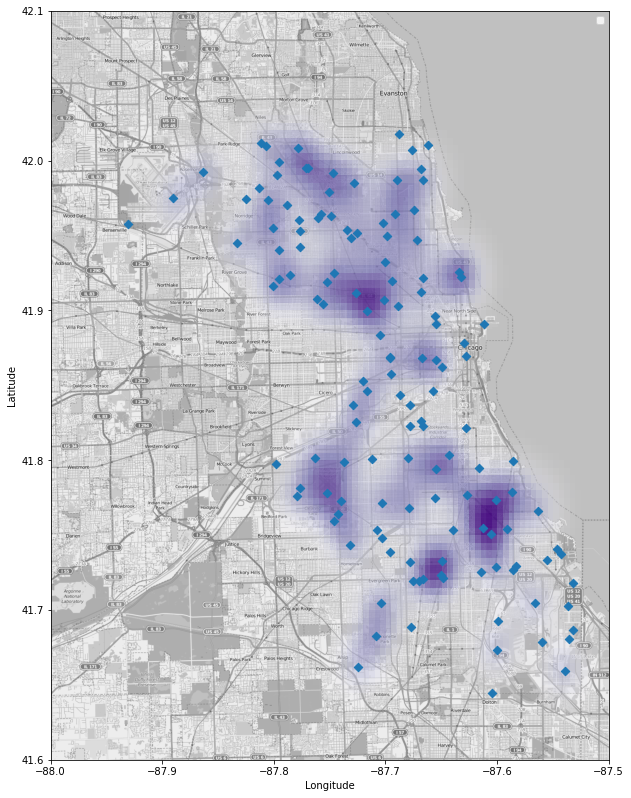

In [96]:
for year in years:
    df_name = 'df' + str(year)
    df_name = df[(df['Date'].dt.year == year) & (df['WnvPresent'] == 1 )]
    df_name = pd.DataFrame(df_name, columns = ['Longitude','Latitude'])
    df_name = df_name[['Longitude', 'Latitude']].drop_duplicates().values
    
    color = plt.cm.Purples
    color._init()
    color._lut[:-3,-1] = abs(np.logspace(0, 1, color.N) / 10 - 1)[::-1]
    # set aspect
    aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
    # fit kernel density onto spray locations
    kd = KernelDensity(bandwidth=0.015)
    kd.fit(df_name)

    spray_x, spray_y = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([spray_x.ravel(),spray_y.ravel()]).T
    spray_z = np.exp(kd.score_samples(gridpoints).reshape(100,100))

    # plot kernel density
    plt.figure(figsize=(10,14))
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=bbox, aspect=aspect)
    plt.imshow(spray_z, origin='lower', cmap=color, extent=bbox, aspect=aspect)
    plt.scatter(traps[:,0], traps[:,1], marker='D', alpha=1)
    plt.legend()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

CULEX PIPENS and CULEX RESTUANS are the most common carriers of the WNV virus.

In the northeastern United States, Culex pipiens, Cx. restuans, and Cx. salinarius have been implicated as the principal vectors because they are physiologically competent (5), frequently infected with the virus in nature, and closely associated with WNV transmission foci (6). However, the precise role that each of these species plays in enzootic transmission among birds or epidemic transmission to humans is not entirely clear. 
link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3291451/